In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_classification, make_gaussian_quantiles
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import GridSearchCV


1. Возьмите набор данных для многоклассовй классификации.


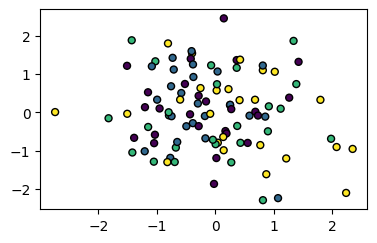

In [19]:
plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)

plt.subplot(324)
X, Y = make_classification(
    n_features=4, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=4
)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=Y, s=25, edgecolor="k")

2. Выберете 2-3 разные модели по типу дерева или байесовского классификатора.  


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)
sk_nb_clf = GaussianNB()
sk_nb_clf.fit(X_train, y_train)
sk_nb_clf_pred_res = sk_nb_clf.predict(X_test)
sk_nb_clf_accuracy = accuracy_score(y_test, sk_nb_clf_pred_res)

print(f'sk Naive Bayes classifier accucacy: {sk_nb_clf_accuracy}')
# print(sk_nb_clf_pred_res)

sk Naive Bayes classifier accucacy: 0.8


In [21]:
clf = svm.SVC(kernel="linear")
clf = clf.fit(X_train, y_train)
clf.fit(X_train, y_train)
clf_pred_res = clf.predict(X_test)
clf_accuracy = accuracy_score(y_test, clf_pred_res)

print(f'accuracy: {clf_accuracy}')


accuracy: 0.9


3. Используйте GridSearchCV для определения лучших гиперпарамеров (для оценки модели используйте кросс валидацию)

In [34]:
from sklearn.naive_bayes import GaussianNB

# Определение гиперпараметров для GridSearchCV
param_grid_bayes = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Использование GridSearchCV
grid_search_bayes = GridSearchCV(estimator = sk_nb_clf, param_grid = param_grid_bayes, cv=5, scoring='accuracy')
grid_search_bayes.fit(X_train, y_train)

# Лучшие параметры и точность
print("Best parameters for Bayes:", grid_search_bayes.best_params_)
print("Best accuracy:", grid_search_bayes.best_score_)


Best parameters for Bayes: {'var_smoothing': 1e-09}
Best accuracy: 0.8875


In [38]:
# from sklearn.model_selection import cross_val_score

# # Создание модели с выбранными гиперпараметрами
# model_bayes = GaussianNB(var_smoothing = 1e-09)

# # Кросс-валидация и оценка производительности
# cv_scores = cross_val_score(model_bayes, X_train, y_train, cv=5, scoring='accuracy')
# average_score = cv_scores.mean()

# # print("Cross-Validation Scores:", cv_scores)
# print("Average Score:", average_score)

Average Score: 0.8875


In [35]:
from sklearn.model_selection import GridSearchCV
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_search_svc = GridSearchCV(svm.SVC(), param_grid_svc, cv=5)
grid_search_svc.fit(X_train, y_train)
print("Best parameters for SVM:", grid_search_svc.best_params_)
print("Best accuracy:", grid_search_svc.best_score_)


Best parameters for SVM: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best accuracy: 0.9


In [37]:
# from sklearn.model_selection import cross_val_score

# # Создание модели с выбранными гиперпараметрами
# model = svm.SVC(C = 1, kernel="rbf", gamma = "auto")

# # Кросс-валидация и оценка производительности
# cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
# average_score = cv_scores.mean()

# # print("Cross-Validation Scores:", cv_scores)
# print("Average Score:", average_score)

Average Score: 0.9


4. Визуализируйте полученные результаты, сделайте сравнительные таблицы и графики.


Bayes Results:
    param_var_smoothing  mean_test_score
0         1.000000e-09           0.8875
1         1.000000e-08           0.8875
2         1.000000e-07           0.8875
3         1.000000e-06           0.8875
4         1.000000e-05           0.8875


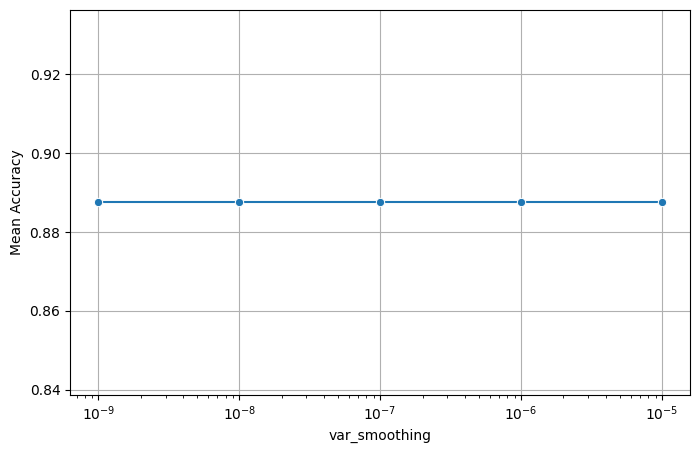

SVM Results:
     param_C param_kernel  mean_test_score
0       0.1       linear           0.8625
1       0.1          rbf           0.8875
2       0.1       linear           0.8625
3       0.1          rbf           0.8875
4       1.0       linear           0.8750
5       1.0          rbf           0.8875
6       1.0       linear           0.8750
7       1.0          rbf           0.9000
8      10.0       linear           0.8750
9      10.0          rbf           0.8625
10     10.0       linear           0.8750
11     10.0          rbf           0.8625


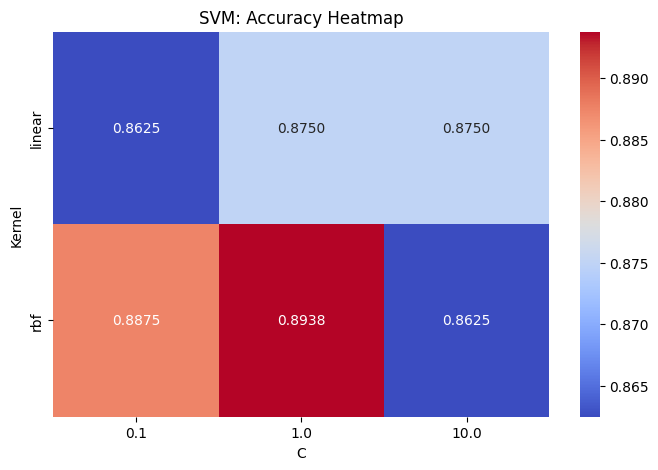

In [55]:
import seaborn as sns

# Результаты для Байеса
bayes_results = pd.DataFrame(grid_search_bayes.cv_results_)
print("Bayes Results:\n", bayes_results[['param_var_smoothing', 'mean_test_score']])

# Построим график для Байеса
plt.figure(figsize=(8, 5))
sns.lineplot(data=bayes_results, x='param_var_smoothing', y='mean_test_score', marker='o')
plt.xscale('log')
plt.xlabel('var_smoothing')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.show()

# Результаты для SVM
svc_results = pd.DataFrame(grid_search_svc.cv_results_)
print("SVM Results:\n", svc_results[['param_C', 'param_kernel', 'mean_test_score']])

# Построим тепловую карту для SVM
svc_pivot = svc_results.pivot_table(
    values='mean_test_score',
    index='param_kernel',
    columns='param_C'
)
plt.figure(figsize=(8, 5))
sns.heatmap(svc_pivot, annot=True, fmt='.4f', cmap='coolwarm')
plt.title('SVM: Accuracy Heatmap')
plt.xlabel('C')
plt.ylabel('Kernel')
plt.show()


In [54]:
comparison_table = pd.DataFrame({
    'Model': ['Naive Bayes',  'SVM (RBF)'],
    'Best Hyperparameters': [
        grid_search_bayes.best_params_,
        {'C': grid_search_svc.best_params_['C'], 'kernel': 'rbf', 'gamma': grid_search_svc.best_params_['gamma']}
    ],
    'Best Accuracy': [
        grid_search_bayes.best_score_,
        grid_search_svc.cv_results_['mean_test_score'][svc_results['param_kernel'] == 'rbf'].max()
    ],
    'Hyperparameters':[
    '1e-09',
    {'C': 1, 'kernel': 'linear', 'gamma':'scale'}
    ],
    'Accuracy': [
        '0.8',
        '0.9'
    ]
})
print("Comparison Table:\n", comparison_table)


Comparison Table:
          Model                        Best Hyperparameters  Best Accuracy  \
0  Naive Bayes                    {'var_smoothing': 1e-09}         0.8875   
1    SVM (RBF)  {'C': 1, 'kernel': 'rbf', 'gamma': 'auto'}         0.9000   

                                  Hyperparameters Accuracy  
0                                           1e-09      0.8  
1  {'C': 1, 'kernel': 'linear', 'gamma': 'scale'}      0.9  


5. Посмотрите какие фреймворки AutoML существуют. Продемонстрируйте работу одного из них на ваш выбор (набор данных тот же)

In [45]:
from tpot import TPOTClassifier

# Инициализация TPOT
tpot = TPOTClassifier(
    generations=5,  # Количество поколений (итераций)
    population_size=20,  # Размер популяции (моделей)
    cv=5,  # Кросс-валидация
    scoring='accuracy',
    random_state=42,
    verbosity=2  # Подробный вывод
)

# Обучение TPOT
tpot.fit(X_train, y_train)

# Оценка на тестовом наборе
tpot_accuracy = tpot.score(X_test, y_test)
print("TPOT Test Accuracy:", tpot_accuracy)

# Экспорт лучшего найденного пайплайна
tpot.export('best_pipeline.py')  # Сохранение лучшей модели


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9125

Generation 2 - Current best internal CV score: 0.9125

Generation 3 - Current best internal CV score: 0.9125

Generation 4 - Current best internal CV score: 0.925

Generation 5 - Current best internal CV score: 0.925

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.7000000000000001, min_samples_leaf=8, min_samples_split=4, n_estimators=100)
TPOT Test Accuracy: 0.8
